In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.3.3'

In [21]:
dataset = pd.read_csv('./steam_reviews.csv', header='infer', nrows=1000000)

In [18]:
dataset.shape

(1000000, 23)

In [14]:
dataset.columns

Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Unnamed: 0                      1000000 non-null  int64  
 1   app_id                          1000000 non-null  int64  
 2   app_name                        1000000 non-null  object 
 3   review_id                       1000000 non-null  int64  
 4   language                        1000000 non-null  object 
 5   review                          998242 non-null   object 
 6   timestamp_created               1000000 non-null  int64  
 7   timestamp_updated               1000000 non-null  int64  
 8   recommended                     1000000 non-null  bool   
 9   votes_helpful                   1000000 non-null  int64  
 10  votes_funny                     1000000 non-null  int64  
 11  weighted_vote_score             1000000 non-null  float64
 12  c

In [23]:
dataset.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [28]:
def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')

In [29]:
dataset = pd.read_csv('./steam_reviews.csv', header='infer',
                      nrows=100000, parse_dates=['timestamp_created', 'timestamp_updated', 'author.last_played'], 
                      date_parser=dateparse)

In [31]:
dataset['timestamp_created']

0       2021-01-23 06:00:29
1       2021-01-23 05:50:30
2       2021-01-23 05:46:40
3       2021-01-23 05:32:50
4       2021-01-23 05:23:47
                ...        
99995   2020-05-27 03:15:22
99996   2020-05-27 03:12:22
99997   2020-05-27 03:04:56
99998   2020-05-27 03:03:39
99999   2020-05-27 02:59:50
Name: timestamp_created, Length: 100000, dtype: datetime64[ns]

In [33]:
dataset.timestamp_created.min()

Timestamp('2020-05-27 02:59:50')

In [34]:
dataset.app_id.min()

292030

In [35]:
dataset.timestamp_created.max()

Timestamp('2021-01-23 06:00:29')

In [36]:
dataset.app_id.mean()

292030.0

In [37]:
dataset.app_id.sum()

29203000000

In [38]:
dataset.timestamp_created.dt.hour

0        6
1        5
2        5
3        5
4        5
        ..
99995    3
99996    3
99997    3
99998    3
99999    2
Name: timestamp_created, Length: 100000, dtype: int64

In [41]:
dataset.timestamp_created.dt.dayofweek

0        5
1        5
2        5
3        5
4        5
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: timestamp_created, Length: 100000, dtype: int64

In [42]:
dataset.loc[5]

Unnamed: 0                                                             5
app_id                                                            292030
app_name                                        The Witcher 3: Wild Hunt
review_id                                                       85184171
language                                                         english
review                            good story, good graphics. lots to do.
timestamp_created                                    2021-01-23 05:21:04
timestamp_updated                                    2021-01-23 05:21:04
recommended                                                         True
votes_helpful                                                          0
votes_funny                                                            0
weighted_vote_score                                                  0.0
comment_count                                                          0
steam_purchase                                     

In [45]:
small_dataset = dataset[5:8]

In [46]:
small_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 5 to 7
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      3 non-null      int64         
 1   app_id                          3 non-null      int64         
 2   app_name                        3 non-null      object        
 3   review_id                       3 non-null      int64         
 4   language                        3 non-null      object        
 5   review                          3 non-null      object        
 6   timestamp_created               3 non-null      datetime64[ns]
 7   timestamp_updated               3 non-null      datetime64[ns]
 8   recommended                     3 non-null      bool          
 9   votes_helpful                   3 non-null      int64         
 10  votes_funny                     3 non-null      int64         
 11  weighted_v

In [49]:
small_dataset[2:3]

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
7,7,292030,The Witcher 3: Wild Hunt,85183602,turkish,.\n,2021-01-23 05:05:12,2021-01-23 05:05:12,True,0,...,True,False,False,76561199084188849,9,1,2701.0,0.0,2701.0,2021-01-03 10:53:38


In [58]:
dataset[((dataset.language == 'turkish') | (dataset.language == 'italian')) & (dataset.timestamp_created.dt.dayofweek == 1)]

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
936,936,292030,The Witcher 3: Wild Hunt,85002956,turkish,leleleleleley,2021-01-19 23:30:19,2021-01-19 23:30:19,True,0,...,True,False,False,76561198829751960,11,2,814.0,772.0,623.0,2021-01-22 19:34:02
944,944,292030,The Witcher 3: Wild Hunt,85000712,turkish,:)))))))))))))))))))))))))))))))))))))))))))))...,2021-01-19 22:28:22,2021-01-19 22:28:22,True,0,...,True,False,False,76561198121934182,46,17,1172.0,904.0,400.0,2021-01-22 18:37:41
951,951,292030,The Witcher 3: Wild Hunt,84998937,italian,One of the best games of the last decade,2021-01-19 21:42:05,2021-01-19 21:42:05,True,0,...,True,False,False,76561198043209941,33,1,9482.0,5035.0,9183.0,2021-01-22 20:10:17
952,952,292030,The Witcher 3: Wild Hunt,84998920,turkish,oyun bal almayan mal,2021-01-19 21:41:40,2021-01-19 21:41:40,True,0,...,True,False,False,76561198888194463,10,4,1815.0,1102.0,1815.0,2021-01-19 16:38:17
959,959,292030,The Witcher 3: Wild Hunt,84996815,turkish,mük,2021-01-19 20:52:15,2021-01-19 20:52:15,True,0,...,True,False,False,76561198396593168,28,4,4164.0,1136.0,3774.0,2021-01-22 12:22:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96652,96652,292030,The Witcher 3: Wild Hunt,70183437,turkish,fena,2020-06-02 08:57:05,2020-06-02 08:57:05,True,0,...,True,False,False,76561199038195892,30,1,2676.0,0.0,1049.0,2020-08-02 11:27:22
96668,96668,292030,The Witcher 3: Wild Hunt,70181935,turkish,"Oyunun hikayesi, hikayede yer alan karakterler...",2020-06-02 08:03:50,2020-06-02 08:03:50,True,0,...,False,False,False,76561198283054556,214,2,7816.0,0.0,4821.0,2020-08-02 07:32:23
96785,96785,292030,The Witcher 3: Wild Hunt,70170997,turkish,Açıkça söyleyebilirim ki dünyanın en iyi açık ...,2020-06-02 01:00:30,2020-06-02 01:00:30,True,4,...,True,False,False,76561198360646360,50,2,6845.0,0.0,6812.0,2020-06-03 18:49:49
96786,96786,292030,The Witcher 3: Wild Hunt,70170741,turkish,3,2020-06-02 00:50:47,2020-06-02 00:50:47,True,0,...,True,False,False,76561198074369448,248,17,2308.0,0.0,1891.0,2020-12-01 11:12:17


In [60]:
dataset[dataset.timestamp_created.dt.dayofweek == 1].language.unique()

array(['schinese', 'english', 'thai', 'russian', 'czech', 'german',
       'turkish', 'polish', 'brazilian', 'italian', 'koreana', 'tchinese',
       'latam', 'spanish', 'french', 'vietnamese', 'portuguese',
       'ukrainian', 'dutch', 'japanese', 'swedish', 'finnish',
       'hungarian', 'greek', 'danish', 'romanian', 'bulgarian',
       'norwegian'], dtype=object)

In [61]:
dataset[dataset.timestamp_created.dt.dayofweek == 1].language.nunique()

28

In [62]:
dataset.groupby('language').review_id.count()

language
brazilian      6000
bulgarian        11
czech           925
danish           80
dutch           146
english       24956
finnish         116
french         1346
german         2230
greek            80
hungarian       228
italian         391
japanese        112
koreana        1810
latam           456
norwegian        69
polish         5811
portuguese      291
romanian         39
russian       17970
schinese      24110
spanish        2866
swedish         201
tchinese        934
thai            462
turkish        8051
ukrainian       231
vietnamese       78
Name: review_id, dtype: int64

In [63]:
dataset.groupby('language')

In [67]:
for language, frame in dataset.groupby('language'):
    print(f'The results for {language} we have {len(frame)} entries')

The results for brazilian we have 6000 entries
The results for bulgarian we have 11 entries
The results for czech we have 925 entries
The results for danish we have 80 entries
The results for dutch we have 146 entries
The results for english we have 24956 entries
The results for finnish we have 116 entries
The results for french we have 1346 entries
The results for german we have 2230 entries
The results for greek we have 80 entries
The results for hungarian we have 228 entries
The results for italian we have 391 entries
The results for japanese we have 112 entries
The results for koreana we have 1810 entries
The results for latam we have 456 entries
The results for norwegian we have 69 entries
The results for polish we have 5811 entries
The results for portuguese we have 291 entries
The results for romanian we have 39 entries
The results for russian we have 17970 entries
The results for schinese we have 24110 entries
The results for spanish we have 2866 entries
The results for swedish

In [69]:
result = dataset.groupby(['language', dataset.timestamp_created.dt.dayofweek]).review_id.count()

In [71]:
result.describe()

count     195.000000
mean      512.820513
std       992.128174
min         1.000000
25%        15.500000
50%        60.000000
75%       370.000000
max      3968.000000
Name: review_id, dtype: float64

In [72]:
dataset.groupby([dataset.timestamp_created.dt.dayofweek, dataset.language]).describe()

Unnamed: 0                                       \
                                  count          mean           std      min   
timestamp_created language                                                     
0                 brazilian       821.0  50765.647990  28753.259764   1247.0   
                  czech           135.0  42703.162963  28855.095840   1330.0   
                  danish           13.0  68530.153846  31154.901607  11920.0   
                  dutch            19.0  52676.263158  30679.842914   1295.0   
                  english        3463.0  53037.531909  28887.730449   1243.0   
...                                 ...           ...           ...      ...   
6                 tchinese        152.0  51507.006579  29135.288381   1749.0   
                  thai             64.0  50182.625000  29829.848031   1652.0   
                  turkish         999.0  45790.965966  30013.751381   1547.0   
                  ukrainian        34.0  51587.970588  29802.933114   4505.0   
                  vietnamese       13.0  39037.846154  29141.515749   4182.0   

                                                                   app_id  \
                                  25%      50%       75%      max   count   
timestamp_created language                                                  
0                 brazilian   26197.0  52230.0  76658.00  97345.0   821.0   
                  czech       18776.0  40278.0  69688.50  97170.0   135.0   
                  danish      48758.0  82470.0  91880.00  97140.0    13.0   
                  dutch       29007.0  60681.0  74197.00  97146.0    19.0   
                  english     26456.5  55884.0  76690.00  97355.0  3463.0   
...                               ...      ...       ...      ...     ...   
6                 tchinese    27959.0  50727.5  77626.00  97914.0   152.0   
                  thai        22959.0  51475.5  75162.50  97821.0    64.0   
                  turkish     19502.0  42584.0  72547.50  97926.0   999.0   
                  ukrainian   27584.5  55254.0  82123.25  97531.0    34.0   
                  vietnamese  19610.0  28341.0  58447.00  87133.0    13.0   

                                        ... author.playtime_last_two_weeks  \
                                  mean  ...                            75%   
timestamp_created language              ...                                  
0                 brazilian   292030.0  ...                           0.00   
                  czech       292030.0  ...                           5.00   
                  danish      292030.0  ...                           0.00   
                  dutch       292030.0  ...                          32.00   
                  english     292030.0  ...                           0.00   
...                                ...  ...                            ...   
6                 tchinese    292030.0  ...                           0.00   
                  thai        292030.0  ...                          58.25   
                  turkish     292030.0  ...                          21.00   
                  ukrainian   292030.0  ...                           0.00   
                  vietnamese  292030.0  ...                           0.00   

                                      author.playtime_at_review               \
                                  max                     count         mean   
timestamp_created language                                                     
0                 brazilian   17720.0                     821.0  4025.079172   
                  czech        5020.0                     135.0  5504.888889   
                  danish       1474.0                      13.0  4535.384615   
                  dutch       16933.0                      19.0  6718.947368   
                  english     13395.0                    3463.0  5605.563673   
...                               ...                       ...          ...   
6               

In [73]:
dataset.groupby([dataset.timestamp_created.dt.dayofweek, dataset.language]).describe().unstack()

Unnamed: 0                                                \
                       count                                                 
language           brazilian bulgarian  czech danish dutch english finnish   
timestamp_created                                                            
0                      821.0       NaN  135.0   13.0  19.0  3463.0    22.0   
1                      778.0       1.0   94.0    6.0  18.0  3331.0    11.0   
2                      912.0       3.0  127.0    9.0  21.0  3523.0    17.0   
3                      917.0       2.0  154.0   16.0  26.0  3622.0    15.0   
4                      851.0       3.0  111.0   15.0  22.0  3525.0    14.0   
5                      845.0       1.0  139.0    8.0  14.0  3704.0    22.0   
6                      876.0       1.0  165.0   13.0  26.0  3788.0    15.0   

                                       ... author.playtime_at_review  \
                                       ...                       max   
language          french german greek  ...                  romanian   
timestamp_created                      ...                             
0                  183.0  330.0   8.0  ...                    5201.0   
1                  172.0  267.0   9.0  ...                    6992.0   
2                  162.0  303.0  11.0  ...                   13207.0   
3                  187.0  317.0  14.0  ...                    6084.0   
4                  225.0  303.0  14.0  ...                    8943.0   
5                  207.0  348.0  15.0  ...                    6510.0   
6                  210.0  362.0   9.0  ...                    4890.0   

                                                                            \
                                                                             
language            russian  schinese   spanish  swedish tchinese     thai   
timestamp_created                                                            
0                  264331.0   58093.0   50913.0  26626.0  28365.0  51410.0   
1                   71512.0  132968.0   56298.0  11270.0  39753.0  17076.0   
2                   88428.0  137347.0   50827.0  13713.0  27350.0  31609.0   
3                  136347.0  128449.0   57140.0  66400.0  70306.0  21460.0   
4                  149185.0   82432.0   31894.0  16196.0  58040.0  13680.0   
5                   74974.0  133839.0  134184.0  40285.0  43513.0  47414.0   
6                  291587.0  194871.0   34945.0  24881.0  74682.0  16937.0   

                                                  
                                                  
language            turkish ukrainian vietnamese  
timestamp_created                                 
0                   49973.0   40718.0     7653.0  
1                   52373.0   29433.0     8338.0  
2                   52820.0   14477.0     4285.0  
3                   60287.0   20020.0    12258.0  
4                  100704.0   48943.0    14936.0  
5                  193046.0   16901.0     4542.0  
6                   61470.0   32651.0    10918.0  

[7 rows x 2912 columns]

In [74]:
import matplotlib.pyplot as plt

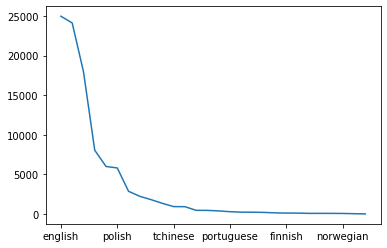

In [76]:
dataset['language'].value_counts().plot()

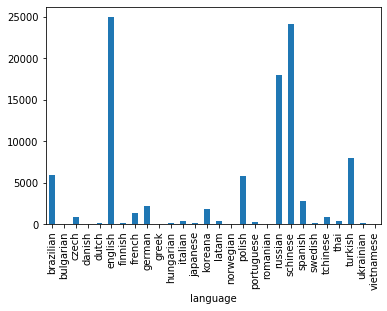

In [83]:
dataset.groupby('language').language.count().plot.bar()

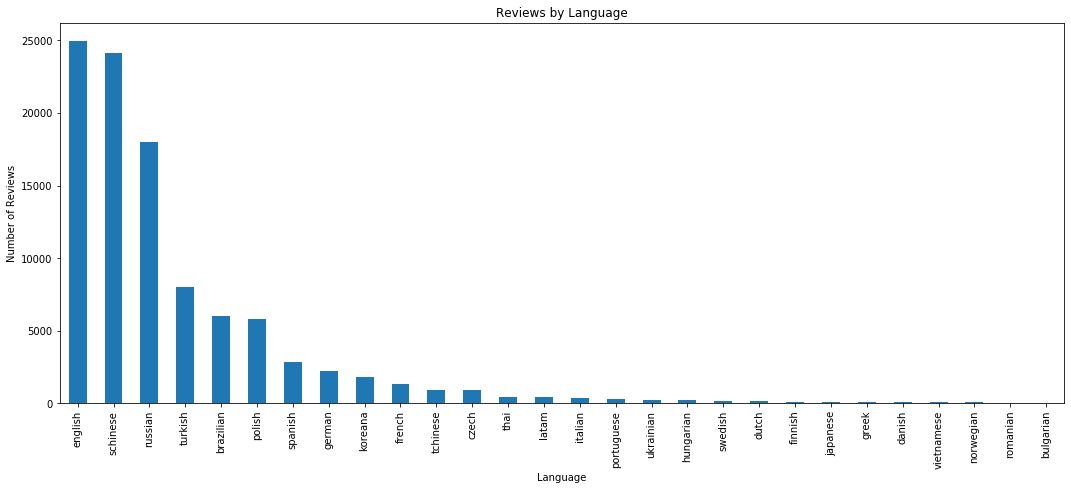

In [85]:
dataset['language'].value_counts().plot.bar(figsize = (18, 7), xlabel='Language', ylabel = 'Number of Reviews', title='Reviews by Language')

In [108]:
dataset['language'].value_counts()

english       24956
schinese      24110
russian       17970
turkish        8051
brazilian      6000
polish         5811
spanish        2866
german         2230
koreana        1810
french         1346
tchinese        934
czech           925
thai            462
latam           456
italian         391
portuguese      291
ukrainian       231
hungarian       228
swedish         201
dutch           146
finnish         116
japanese        112
greek            80
danish           80
vietnamese       78
norwegian        69
romanian         39
bulgarian        11
Name: language, dtype: int64

In [112]:
explode_array = []

In [113]:
for language in dataset['language'].value_counts():
    if language > 10000:
        explode_array.append(0.2)
    else:
        explode_array.append(0.05)

In [114]:
explode_array

[0.2,
 0.2,
 0.2,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05]

In [111]:
[0.2 if language > 10000 else 0.05 for language in dataset['language'].value_counts()]

[0.2,
 0.2,
 0.2,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05]

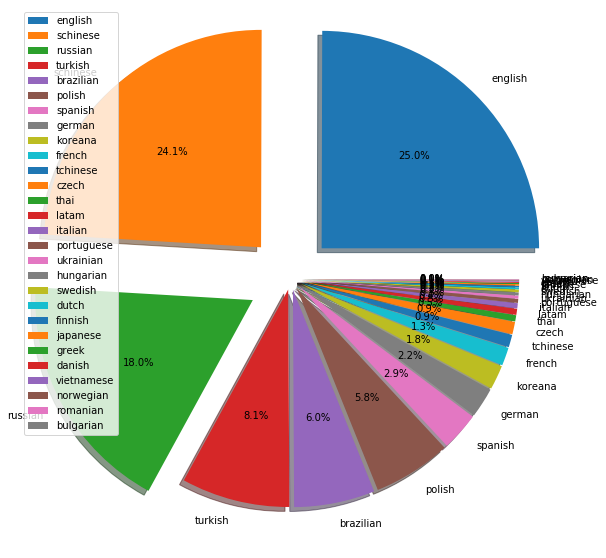

In [115]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(dataset['language'].value_counts(), 
        labels = dataset['language'].value_counts().index, 
        explode = [0.2 if language > 10000 else 0.05  for language in dataset['language'].value_counts()],
        shadow=True, autopct = '%.1f%%')
plt.legend()
plt.show()

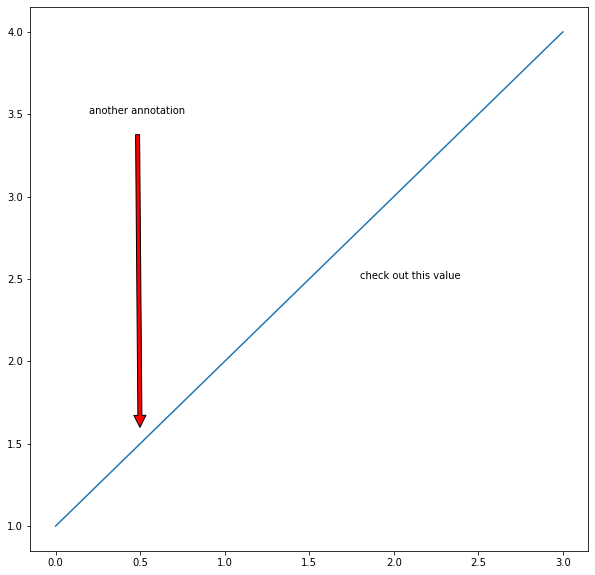

In [131]:
plt.plot([1,2,3,4])
plt.text(1.8, 2.5, 'check out this value')
plt.annotate('another annotation', xy=(0.5, 1.5), xytext=(.2, 3.5), arrowprops=dict(facecolor='red',shrink=0.05))
plt.show()

In [132]:
hour_reviews = dataset.groupby(dataset.timestamp_created.dt.hour)

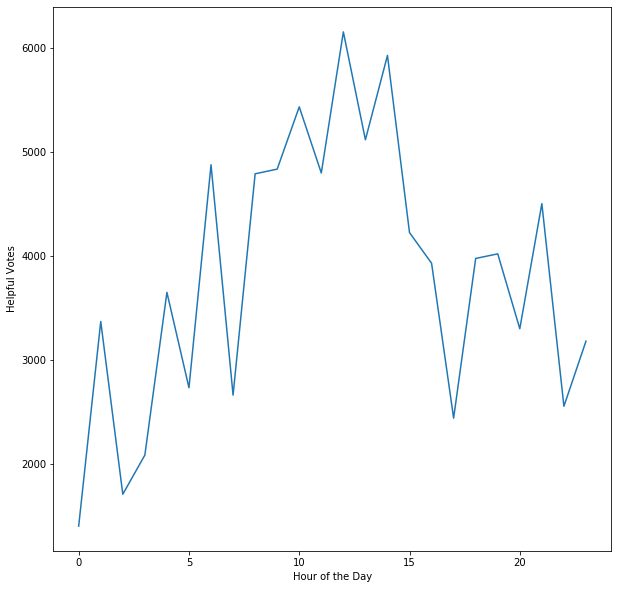

In [139]:
hour_reviews.votes_helpful.sum().plot(xlabel='Hour of the Day', ylabel='Helpful Votes')

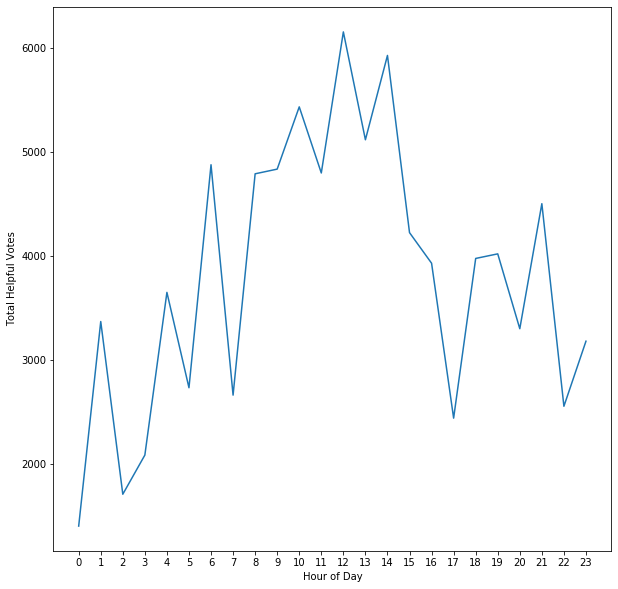

In [138]:
plt.figure()
hour_reviews.votes_helpful.sum().plot()
plt.xlabel("Hour of Day")
plt.ylabel("Total Helpful Votes")
plt.xticks(range(0,24))
plt.show()

In [140]:
!pip install cutecharts

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [141]:
import cutecharts.charts as ctc

In [143]:
chart = ctc.Pie('Title', width='600px', height='300px')

In [144]:
chart.pie(dataset['language'].value_counts())

AttributeError: 'Pie' object has no attribute 'pie'

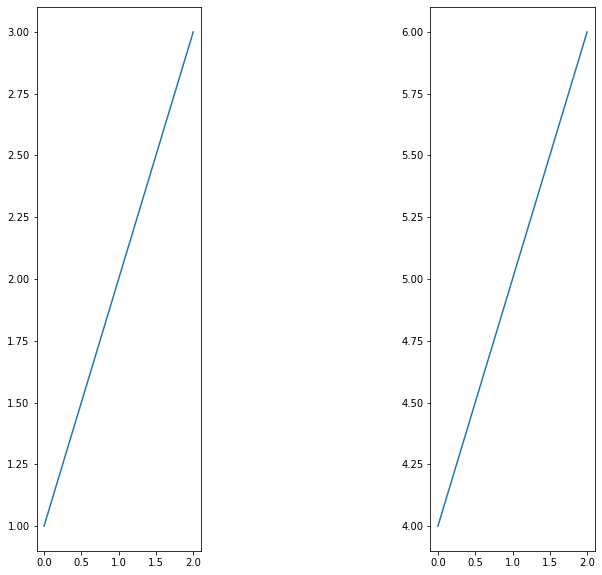

In [147]:
plt.figure()
plt.subplot(131)
plt.plot([1, 2, 3])
plt.subplot(133)
plt.plot([4, 5, 6])
plt.show()

In [44]:
dataset[0:4]

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
